# Samuel Moraes - TP1

## Parte 1 (imágenes en /white_patch y /coord_cromaticas):
### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.



In [20]:
import os
import cv as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [2]:
# Cargar una imagen 
img = cv.imread("coord_cromaticas/CoordCrom_1.png")

[[217 216 217 ... 180 177 176]
 [216 216 216 ... 175 178 176]
 [216 217 217 ... 176 176 173]
 ...
 [103 104 107 ...  76  79  78]
 [104 102 103 ...  79  82  79]
 [102 101 102 ...  82  78  76]]
Canal rojo


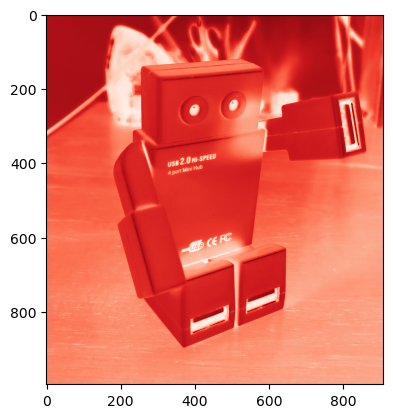

Canal verde


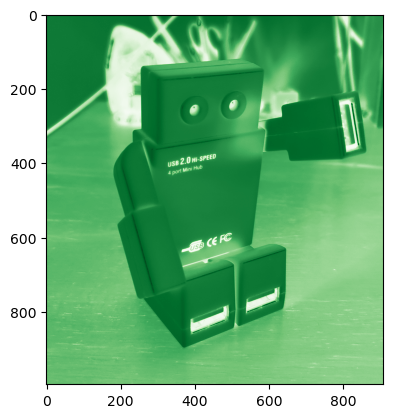

Canal azul


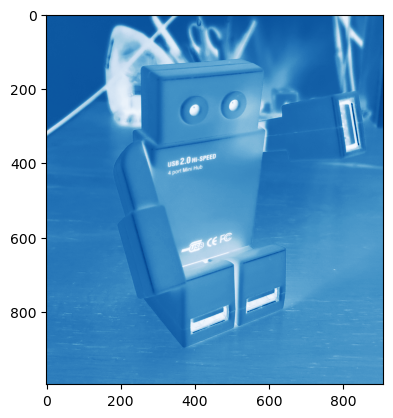

In [17]:
im_r, im_g, im_b = cv.split(img)
print(im_r)
print('Canal rojo')
plt.imshow(im_r, cmap='Reds')
plt.show()
print('Canal verde')
plt.imshow(im_g, cmap='Greens')
plt.show()
print('Canal azul')
plt.imshow(im_b, cmap='Blues')
plt.show()

Processing image: CoordCrom_1.png-1
Image #1


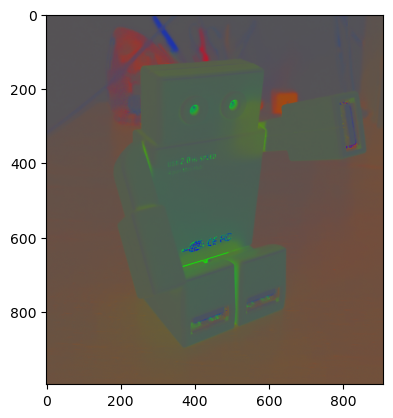

Processing image: CoordCrom_2.png-2
Image #2


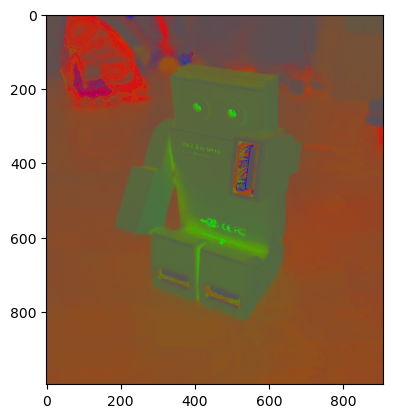

Processing image: CoordCrom_3.png-3
Image #3


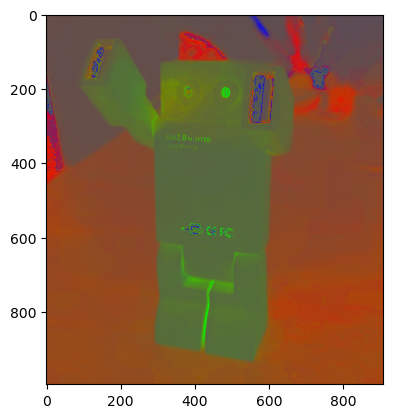

Image processing completed for all files in the directory.


In [9]:
#Coordenadas Cromaticas

def rgb_to_chromatic(image):
    # Separar los canales
    R = image[:, :, 2].astype(float)
    G = image[:, :, 1].astype(float)
    B = image[:, :, 0].astype(float)
    
    # Calcular R, G, B
    sum_rgb = R + G + B
    # Evitar division por cero
    sum_rgb[sum_rgb == 0] = 1e-6
    
    # Calcular coordenadas
    r = R / sum_rgb
    g = G / sum_rgb
    # Calculate b as 1 - r - g
    b = 1 - r - g
    
    return r, g, b

def generate_rgb_chromatic_descriptor(image_path):
    # Load the image
    image = cv.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Ninguna imagen encontrada en el camino: {image_path}")
    # Calcular coordenadas
    r, g, b = rgb_to_chromatic(image)
    return r, g, b

def create_chromatic_image(r, g, b):
    # sumando las coordinadas
    chromatic_image = np.dstack((r, g, b))

    # Escalar para [0, 255] para visualización
    chromatic_image = (chromatic_image * 255).astype(np.uint8)
    return chromatic_image

def chromatic_pipeline(directory_path):
    try:
        if not os.path.exists(directory_path):
            print(f"Error: Directorio '{directory_path}' no existe.")
            return

        file_count = 0
        for filename in os.listdir(directory_path):
            file_path = os.path.join(directory_path, filename)
            if os.path.isfile(file_path):
                file_count += 1
                
                print(f"Procesando imagen: {filename}")

                r, g, b = generate_rgb_chromatic_descriptor(file_path)
                chromatic_image = create_chromatic_image(r, g, b)
                cv.imwrite(f'chromatic_image_{file_count}.jpg', chromatic_image)

                print(f'Image #{file_count}')
                plt.imshow(chromatic_image, cmap='brg')
                plt.show()
        print("Procesamiento completo para todos los archivos.")
    except Exception as e:
        print(f"Error: {str(e)}")


# Example usage
images_path = 'coord_cromaticas/' 
chromatic_pipeline(images_path)


### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Procesando imagen: test_blue.png
Image #1


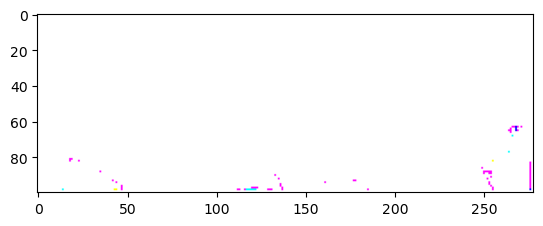

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Procesando imagen: test_green.png
Image #2


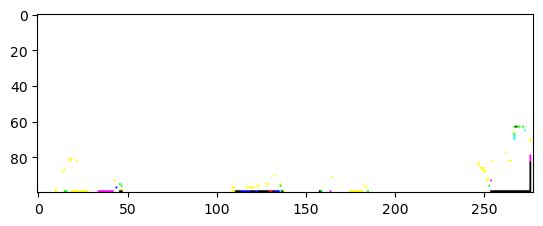

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Procesando imagen: test_red.png
Image #3


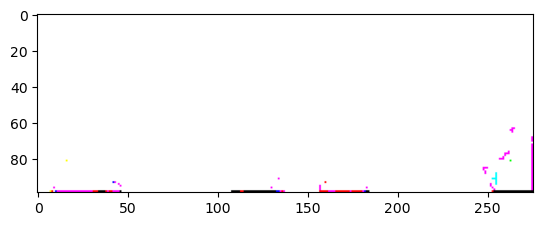

Procesando imagen: wp_blue.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image #4


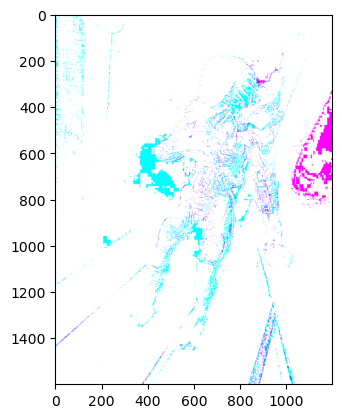

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Procesando imagen: wp_green.png
Image #5


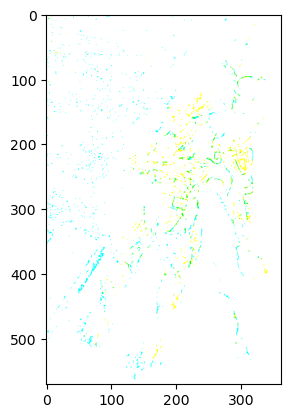

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Procesando imagen: wp_green2.jpg
Image #6


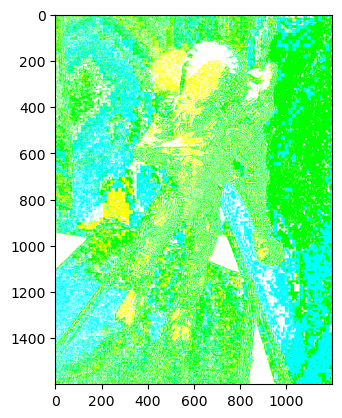

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Procesando imagen: wp_red.png
Image #7


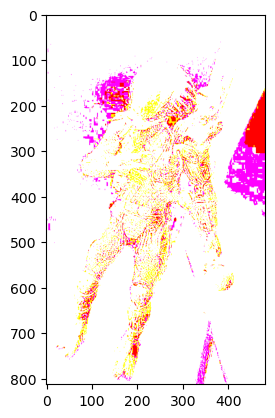

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Procesando imagen: wp_red2.jpg
Image #8


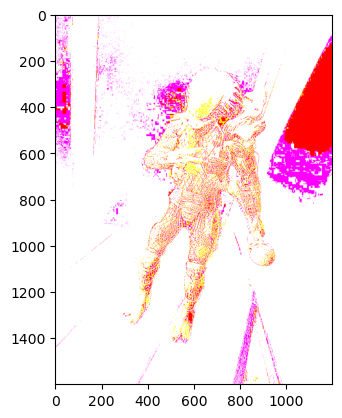

Procesamiento completo para todos los archivos.


In [10]:
# Algoritmo White Patch

def extract_max_rgb(image):

    # Carga tu imagen (reemplaza 'imagen.jpg' con la ruta de tu archivo de imagen)
    img = cv.imread(image)

    # Extrae los canales rojo, verde y azul (RGB)
    blue_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    red_channel = img[:, :, 2]

    # Encuentra el valor máximo en cada canal
    max_b = blue_channel.max()
    max_g = green_channel.max()
    max_r = red_channel.max()
    
    return max_r, red_channel, max_g, green_channel, max_b, blue_channel

def normalize_to_white_pure(max_r, red_channel, max_g, green_channel, max_b, blue_channel):
        
    imgwp = cv.merge(((255/max_r) * red_channel , (255/max_g) * green_channel, (255/max_b) * blue_channel))

    return imgwp

def chromatic_pipeline(directory_path):
    try:

        if not os.path.exists(directory_path):
            print(f"Error: Directorio '{directory_path}' no existe.")
            return

        file_count = 0
        for filename in os.listdir(directory_path):
            file_path = os.path.join(directory_path, filename)
            if os.path.isfile(file_path):
                file_count += 1

                print(f"Procesando imagen: {filename}")

                max_r, r, max_g, g, max_b, b = extract_max_rgb(file_path)

                white_patch = normalize_to_white_pure(max_r, r, max_g, g, max_b, b)

                cv.imwrite(f'whitepatch_image_{file_count}.jpg', white_patch)

                print(f'Image #{file_count}')
                plt.imshow(white_patch, cmap='brg')
                plt.show()
        print("Procesamiento completo para todos los archivos.")
    except Exception as e:
        print(f"Error: {str(e)}")


# Example usage
images_path = 'white_patch/' 
chromatic_pipeline(images_path)

### 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

Respuesta: Como podemos observar en los resultados arriba, el algoritmo White Patch es utilizado para hacer una correción de la luz que ilumina la escena, el algoritmo lleva en cuenta un calculo de los maximos de cada canal de color (255), pero como cada imagen disponible solo tiene 1 uno canal de color, el calculo no se hizo bien y el equilibrio de iluminación no quedó bueno. Para un mejor resultado, deberíamos hacer un merge de las imagenes y rehacer los calculos utilizando el algoritmo de White Patch.

## Parte 2:
### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 

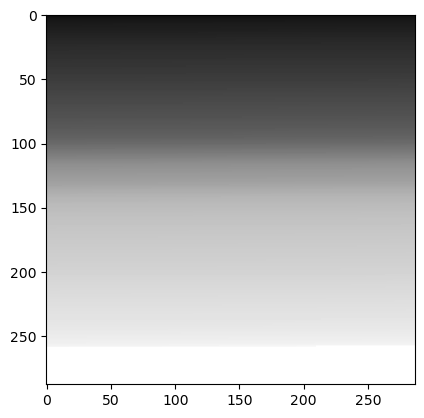

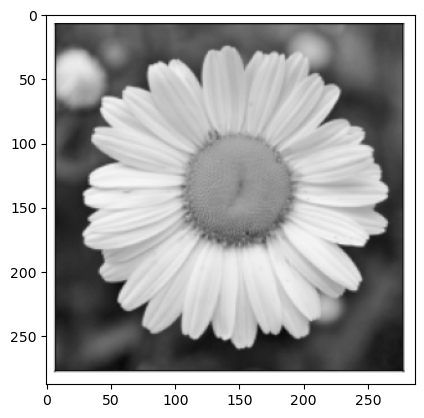

In [13]:
# Cargar una imagen en modo monocromático (un canal)
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray')
plt.show()
plt.imshow(img2, cmap='gray')
plt.show()


### 2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
### Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?


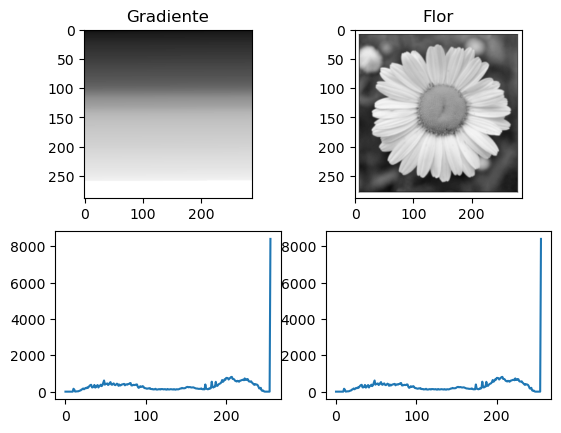

In [18]:
# Comparación de las figuras
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img1, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Gradiente')

hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen ecualizada
ax2=plt.subplot(222)
ax2.imshow(img2, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Flor')

hist2,bins2 = np.histogram(img2.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()


Se observa en las imagenes arriba y sus histogramas que a pesar de ser imagenes distintas, sus histogramas son identicos y sus observaciones caen e los mismos intervalos desde el 0 hasta el 256 que es el valor de bin elegido.
Debido al resultado de los histogramas seren iguales, no se puede utilizar los histogramas para entrenar un modelo pues son imagenes distintas y no tienen ninguna similitud.

### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

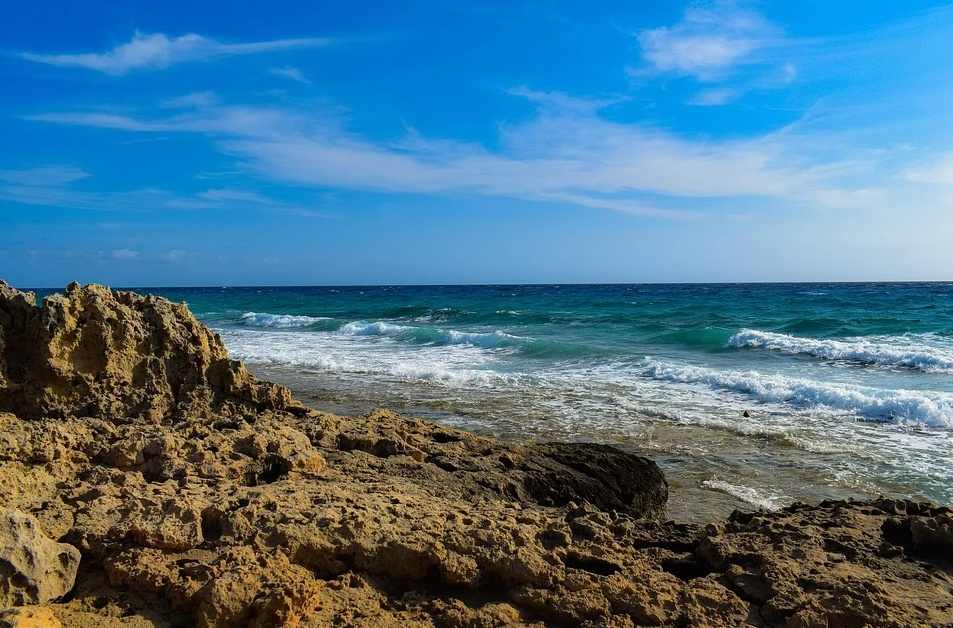

In [21]:

# Plot the image
def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        ax.axis('off')
 
#Image loading
img_segmentation = cv.imread("segmentacion.png")
# Show image
imshow(img_segmentation)


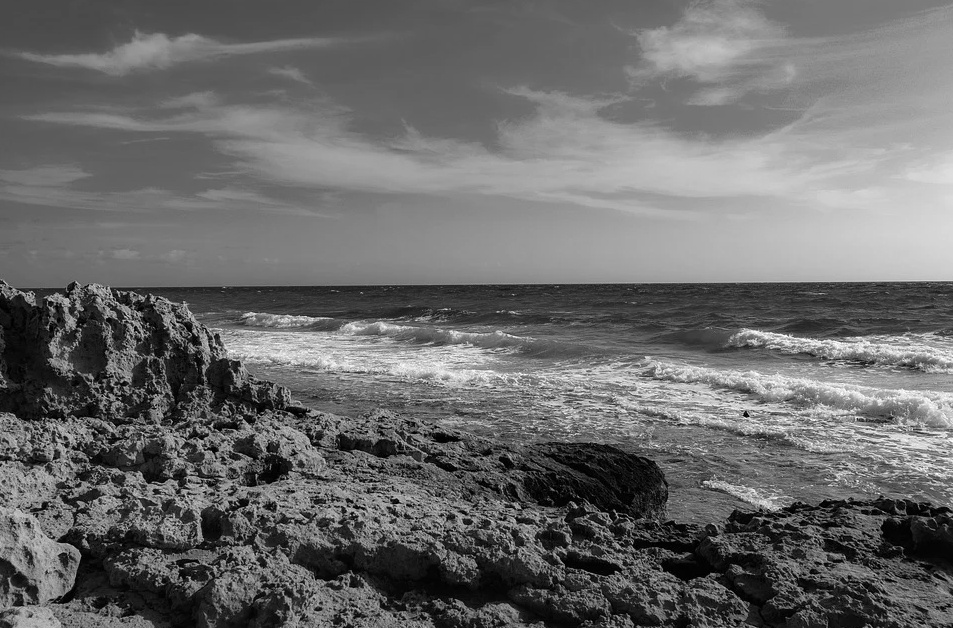

In [23]:

#image grayscale conversion
gray = cv.cvtColor(img_segmentation, cv.COLOR_BGR2GRAY)
imshow(gray)


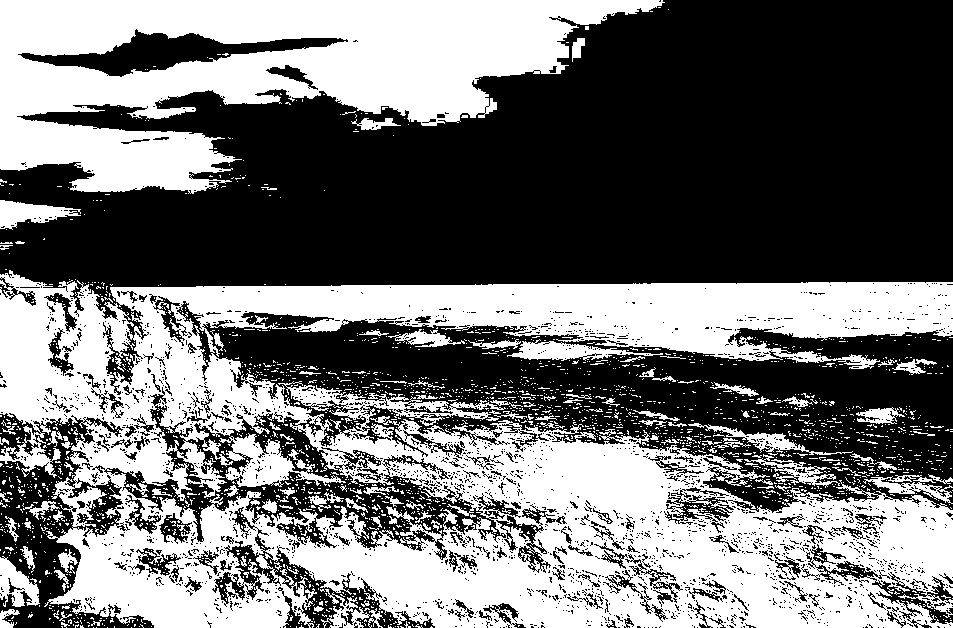

In [24]:


#Threshold Processing
ret, bin_img = cv.threshold(gray,
                             0, 255, 
                             cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
imshow(bin_img)


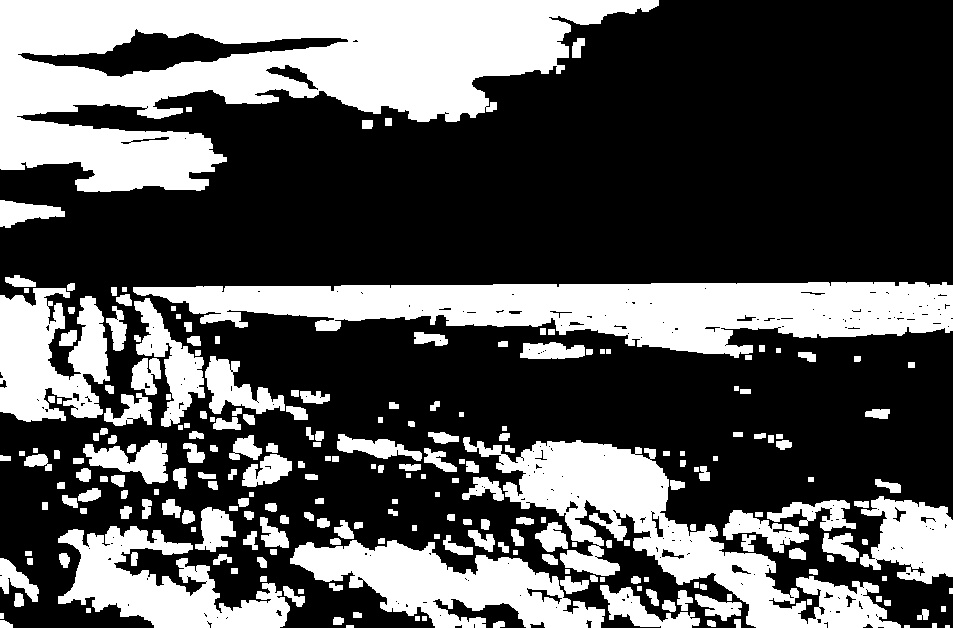

In [26]:


# noise removal
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
bin_img = cv.morphologyEx(bin_img, 
                           cv.MORPH_OPEN,
                           kernel,
                           iterations=2)
imshow(bin_img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


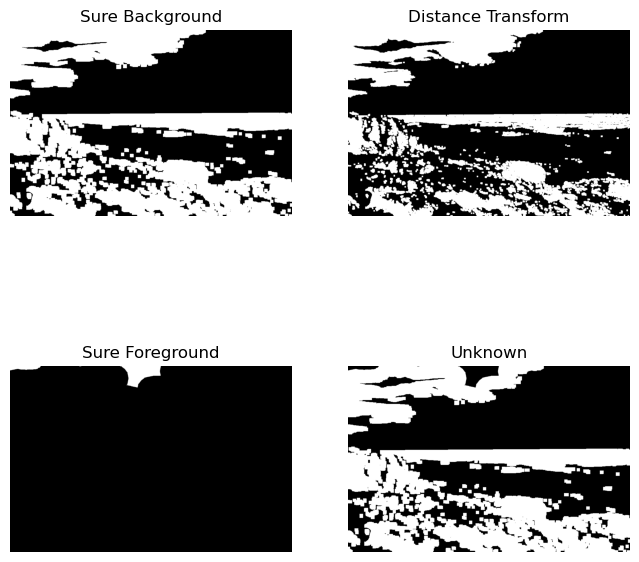

In [27]:


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv.dilate(bin_img, kernel, iterations=3)
imshow(sure_bg, axes[0,0])
axes[0, 0].set_title('Sure Background')
 
# Distance transform
dist = cv.distanceTransform(bin_img, cv.DIST_L2, 5)
imshow(dist, axes[0,1])
axes[0, 1].set_title('Distance Transform')
 
#foreground area
ret, sure_fg = cv.threshold(dist, 0.5 * dist.max(), 255, cv.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)  
imshow(sure_fg, axes[1,0])
axes[1, 0].set_title('Sure Foreground')
 
# unknown area
unknown = cv.subtract(sure_bg, sure_fg)
imshow(unknown, axes[1,1])
axes[1, 1].set_title('Unknown')
 
plt.show()


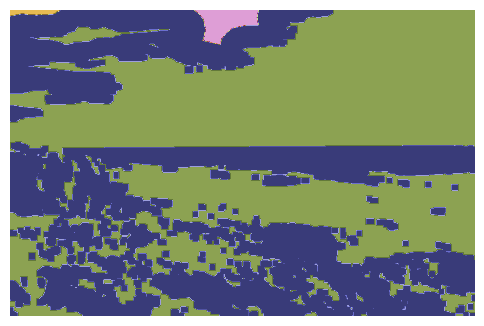

: 

In [28]:

# Marker labelling
# sure foreground 
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0
 
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()
